**How You Get weight and bias using svm in Real Training** <br />
Train the SVM: When you fit the SVM using your dataset (e.g., svm.fit(X, y)), the model:

- Finds the optimal weights (𝑤).
- Computes the optimal bias (𝑏).
- Extract the Bias: After training, the value of 𝑏 is stored in svm.coef_ and svm.intercept_. <br/>
**svm.coef_:**  <br/>
In a linear SVM, the weight vector 𝑤 determines the orientation of the hyperplane. It is perpendicular to the hyperplane and influences the direction and slope of the decision boundary. <br/>
**svm.intercept_**<br/>
The bias 𝑏 (or intercept) shifts the hyperplane from the origin. It determines where the hyperplane cuts the axis.<br/>

In [ ]:
from sklearn.svm import SVC
import numpy as np

# Example dataset
X = np.array([[4.5, 2.3], [-1.2, 3.4], [5.1, 1.7], [-0.8, 4.0]])
y = np.array([1, -1, 1, -1])

# Train a linear SVM
svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

# Retrieve weights and bias
w = svm.coef_[0]
b = svm.intercept_[0]

# Print values
print(f"Weights (w): {w}")
print(f"Bias (b): {b}")


Weights (w): 0.3421562277191375
Bias (b): -0.28728216498012216


**Steps to Find the Hyperplane** <br/>  
1. Solve for 𝑤 and 𝑏:
   - Use optimization (like quadratic programming) to minimize: 1/2.∥**w**∥² 
   - Subject to: yᵢ (wᵀxᵢ + b) ≥ 1
   - Once 𝑤 and 𝑏 are determined, they define the hyperplane.
2. Equation of the Hyperplane:
   - The hyperplane is:   wᵀx + b = 0
   - For 2D:              w₁x₁ + w₂x₂ + b = 0
   - Rearranging for x₂: x₂ = - (w₂ / w₁) x₁ - (w₂ / w₁) b
   - This represents a line in 2D.​
3. Margins:
   - SVM maximizes the margin between the two classes. The margin boundaries are: <br />
  The equations are represented as:  <br />
  wᵀx + b = 1  (for positive class) <br />
  wᵀx + b = -1 (for negative class)

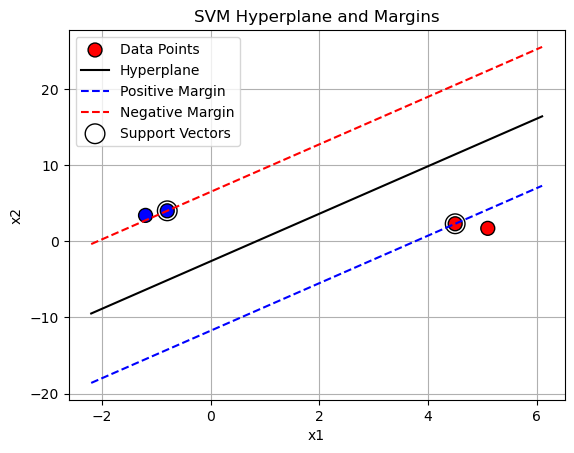

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Dataset: Features (x1, x2) and Labels (y)
X = np.array([
    [4.5, 2.3],
    [-1.2, 3.4],
    [5.1, 1.7],
    [-0.8, 4.0]
])
y = np.array([1, -1, 1, -1])  # Labels

# Train a linear SVM
svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

# Extract weights and bias
w = svm.coef_[0]  # Weight vector
b = svm.intercept_[0]  # Bias

# Define the hyperplane function
def hyperplane(x1, w, b):
    return -(w[0] * x1 + b) / w[1]

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100, edgecolors='k', label="Data Points")

# Plot the hyperplane
x1_vals = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
x2_vals = hyperplane(x1_vals, w, b)
plt.plot(x1_vals, x2_vals, 'k-', label="Hyperplane")

# Plot the margins
x2_margin_pos = hyperplane(x1_vals, w, b - 1)
x2_margin_neg = hyperplane(x1_vals, w, b + 1)
plt.plot(x1_vals, x2_margin_pos, 'b--', label="Positive Margin")
plt.plot(x1_vals, x2_margin_neg, 'r--', label="Negative Margin")

# Highlight support vectors
support_vectors = svm.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=200, facecolors='none', edgecolors='k', label="Support Vectors")

# Labels and legend
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM Hyperplane and Margins")
plt.grid()
plt.show()
